In [1]:
%matplotlib inline
import sys, os
import matplotlib
matplotlib.style.use("ggplot")
import matplotlib.pyplot as plt
import pandas as pd

data_dir = os.path.join(os.getcwd(), "data")
import pcse
print("This notebook was built with:")
print("python version: %s " % sys.version)
print("PCSE version: %s" %  pcse.__version__)

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.


This notebook was built with:
python version: 3.6.3 (default, Nov 10 2017, 18:38:13) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.37)] 
PCSE version: 5.4.1


In [2]:
##作物パラメータ
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'crop', 'crop_custom.crop')
cropdata = CABOFileReader(cropfile)
print(cropdata)

** $Id: sug0601.cab 1.3 1997/09/25 14:07:02 LEM release $
** File SUG0601.CAB
** CROP DATA FILE for use with WOFOST Version 5.4, June 1992
**
** SUGAR BEET 601
** Regions : Germany, Northern and Central France, Netherlands, Belgium,
**           Luxembourg, UK, Ireland, Denmark
** Sowing date : between 1 and 10 April
** mean date of harvest : between 17 and 27 October
** Derived from SUCROS87 data set for sugar beet.
** Calibrated for use in WOFOST model at the Centre for Agrobiological
** Research (CABO-DLO) for the simulation of crop growth and yield on the
** basis of daily weather data.
** Purpose of application: Crop growth monitoring with agrometeorological
** model in the EC.
** Developed in the framework of JRC Agriculture Project Action 3.
------------------------------------
TBASEM: 20.0 <class 'float'>
TEFFMX: 30.0 <class 'float'>
TSUMEM: 90.0 <class 'float'>
IDSL: 0 <class 'int'>
DLO: -99.0 <class 'float'>
DLC: -99.0 <class 'float'>
TSUM1: 650.0 <class 'float'>
TSUM2: 1400.

In [3]:
##土壌パラメータ
##soil = pcse.soil.WaterbalancePP(2004/1/1,0.300)
##print(soil)
soilfile = os.path.join(data_dir, 'soil', 'custom.soil')
soildata = CABOFileReader(soilfile)
print(soildata)

** $Id: ec3.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC3-medium fine
------------------------------------
SMW: 0.1 <class 'float'>
SMFCF: 0.5 <class 'float'>
SM0: 0.9 <class 'float'>
CRAIRC: 0.06 <class 'float'>
K0: 25.586 <class 'float'>
SOPE: 0 <class 'int'>
KSUB: 0 <class 'int'>
SPADS: 0.1 <class 'float'>
SPODS: 0.03 <class 'float'>
SPASS: 0.2 <class 'float'>
SPOSS: 0.05 <class 'float'>
DEFLIM: -0.3 <class 'float'>
RDMSOL: 120 <class 'int'>
SOLNAM: EC3-medium fine <class 'str'>
SMTAB: [-1.0, 0.1, 1.0, 0.108, 1.3, 0.389] <class 'list'>
CONTAB: [0.0, 0.408, 1.0, -0.507, 1.3, -0.215] <class 'list'>



In [4]:
##サイトパラメータ
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=100, CO2=360)
print(sitedata)

{'IFUNRN': 0, 'NOTINF': 0, 'SSI': 0.0, 'SSMAX': 0.0, 'WAV': 100.0, 'SMLIM': 0.4, 'CO2': 360.0}


In [5]:
##パラメータの統合
from pcse.base_classes import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)

In [6]:
##アグロマネジメント
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'agro', 'custom.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)

!!python/object/new:pcse.fileinput.yaml_agro_loader.YAMLAgroManagementReader
listitems:
- 2004-01-01:
    CropCalendar:
      crop_end_date: 2004-03-30
      crop_end_type: earliest
      crop_name: spring-wheat
      crop_start_date: 2004-01-01
      crop_start_type: emergence
      max_duration: 300
      variety_name: spring-wheat-1
    StateEvents: null
    TimedEvents:
    - comment: All nitrogen amounts in g N m-2
      event_signal: apply_n
      events_table:
      - 2004-01-10:
          amount: 0
          recovery: 0.7
      - 2004-02-05:
          amount: 0
          recovery: 0.7
      name: Nitrogen application table



In [7]:

##気象データ
from pcse.fileinput import ExcelWeatherDataProvider
weatherfile_path = os.path.join(data_dir, 'meteo', 'weather_custom.xlsx')
wdp = ExcelWeatherDataProvider(weatherfile_path)

In [8]:
##モデルの初期化
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)

In [11]:
##実行
days = 60
for day in range(days):
    ##weatherfile_path = os.path.join(data_dir, 'meteo', 'weather_custom.xlsx')
    ##weatherfile = open(weatherfile_path,'a')
    ##weatherfile.close
    ##wdp = ExcelWeatherDataProvider(weatherfile_path)
    ##wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
    wofsim.run()
    a = wofsim.get_variable("STAGE")
##wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

,DVS,LAI,RD,SM,TAGP,TRA,TWLV,TWRT,TWSO,TWST,WWLOW
day,,,,,,,,,,,
2004-03-26,1.565000,0.000577,112.0,0.840420,1.664953,0.000151,0.817284,0.398442,0.445919,0.401750,101.327050
2004-03-27,1.577857,0.000548,113.2,0.840874,1.713652,0.000148,0.819719,0.402688,0.487313,0.406620,101.306895
2004-03-28,1.590714,0.000537,114.4,0.841320,1.778624,0.000133,0.822967,0.408217,0.542613,0.413044,101.287036
2004-03-29,1.603571,0.000511,115.6,0.841774,1.856794,0.000123,0.826876,0.414633,0.609289,0.420630,101.269019
2004-03-30,1.616429,0.000501,116.8,0.842217,1.917581,0.000130,0.829915,0.419441,0.661249,0.426417,101.250995


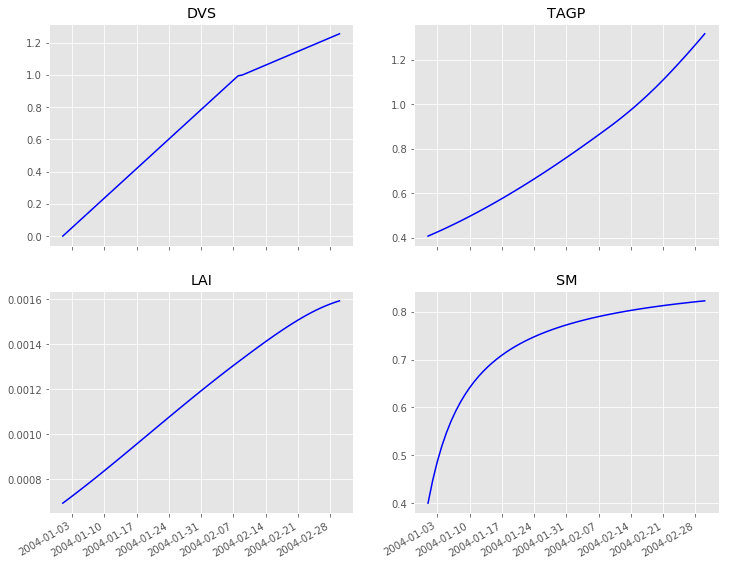

In [10]:
##可視化
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()